In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# from sklearn.datasets import fetch_california_housing
# from sklearn.datasets import 

# # Load the dataset
# housing = fetch_california_housing()
# X = housing.data
# y = housing.target

# # Convert to DataFrame for easier viewing
# import pandas as pd
# df = pd.DataFrame(X, columns=housing.feature_names)
# df['target'] = y
# print(df)
from sklearn import datasets

# See all available items
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_fried

In [3]:
#importing boston house price dataset
#house_price_dataset = sklearn.datasets.load_boston()
house_price_dataset = pd.read_csv('data/housing.csv')

print(house_price_dataset)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [4]:
#loading the dataset to pandas dataframe
# house_price_dataframe = pd.DataFrame(house_price_dataset.data[0], columns = house_price_dataset.feature_names)

# house_price_dataframe.head()

#print("First row:", house_price_dataset.data[0])

#print(house_price_dataset.iloc[0])

# Or to see it as a DataFrame with column names
print(house_price_dataset.head(0))




Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


In [5]:
house_price_dataset.head()

house_price_dataset = house_price_dataset.rename(columns={'MEDV': 'price'})
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
# No of rows & colomn
house_price_dataset.shape

(506, 14)

In [7]:
#checking for missing values
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
price       0
dtype: int64

In [ ]:
house_price_dataset = house_price_dataset.drop("price" ; axis=1)
house_price_dataset.shape

(394, 14)

In [9]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


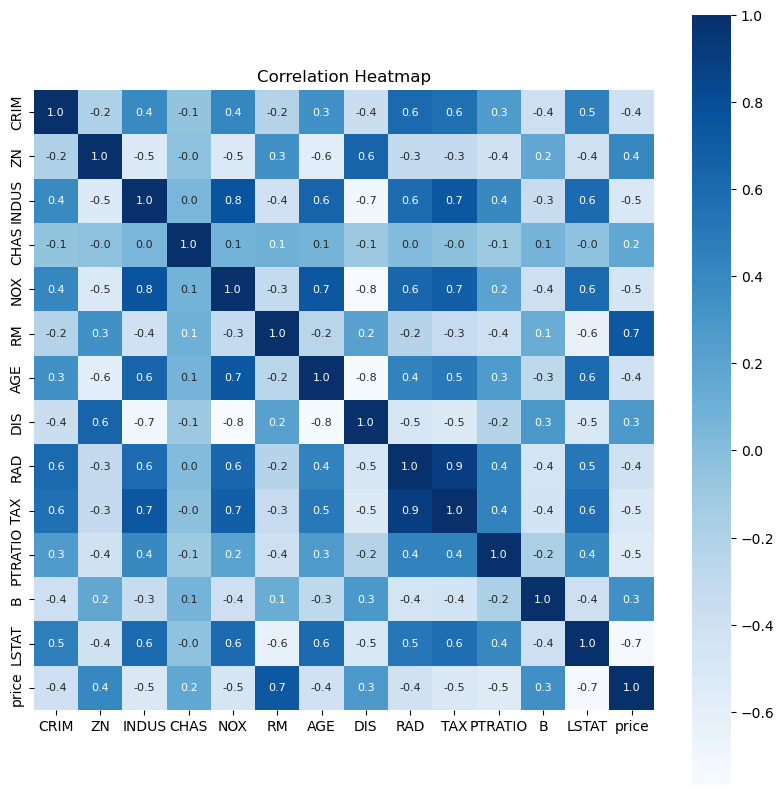

In [10]:
#Understanding the correlation between various feature in dataset
#1, Postive correlation
#2, Negative Correlations
model = XGBRegressor(
    objective='reg:squarederror',  # Loss function
    n_estimators=100,               # Number of trees
    learning_rate=0.1,              # Step size
    max_depth=5,                    # Tree depth
    random_state=42,                # Reproducibility
    subsample=0.8,                  # Row sampling
    colsample_bytree=0.8           # Column sampling
)

correlation = house_price_dataset.corr()
correlation

#Constructing heat map
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
#Splitting the data and target
X = house_price_dataset.drop(['price'], axis=1)
y = house_price_dataset['price']

print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [22]:
#Splitting the data into train data and test data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


In [13]:
print(X.shape, X_train.shape, X_test.shape)

(394, 13) (315, 13) (79, 13)


In [23]:
#Model Training
#XGBoost Regressor
#loading model
model = XGBRegressor()

# model = XGBRegressor(
#     objective='reg:squarederror',  # Loss function
#     n_estimators=100,               # Number of trees
#     learning_rate=0.1,              # Step size
#     max_depth=5,                    # Tree depth
#     random_state=42,                # Reproducibility
#     subsample=0.8,                  # Row sampling
#     colsample_bytree=0.8           # Column sampling
# )

model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [24]:
#Evaluation
#Prediction on training data

#Accuracy for prediction on training data  
training_data_prediction = model.predict(X_train)

print(training_data_prediction)

[18.196693  33.82243   13.406632  33.40623   19.47662   24.50169
 13.101878  16.218792  15.597939  16.805227  30.985027  17.793661
 21.197266  43.07169   15.379695  18.323412  28.691029  23.093904
 17.504074  29.801907   8.513918  11.492635   7.505912  13.098948
 19.60041   11.288555  50.00553   23.308292  21.705444  19.200773
 21.687393  49.998962  49.987953  24.103462  26.603178  18.605536
 24.99952   19.198933  24.402084  17.708181  20.390564  18.098602
 11.698733  13.79717   15.093559   9.604113  19.49647   20.799805
 19.983091  19.027605  17.895998  33.202877  18.516226  13.40242
 11.701119  13.597181  22.498653  24.199188  29.080719  13.807177
 19.902653  20.598276  42.301357  31.599756  24.803648  13.106118
 24.295126   8.703587  20.102795  29.010124   7.197323  23.60467
 18.00188   20.40465   24.602394  14.095489  14.794676  22.805702
 21.601051  23.699862  19.997244  15.605707  18.488014  23.098309
 32.99982   28.69075   21.399992  22.19821   29.001196  20.793724
 27.485743  1

In [30]:

#Evaluation
#R squared error & mean squeared error

score_1 = metrics.r2_score(y_train, training_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R squered error : ", score_1)

print("Mean absolute error : ", score_2 )

R squered error :  0.9999990967949034
Mean absolute error :  0.006078408559163554


Text(0, 0.5, 'Predicted Prices')

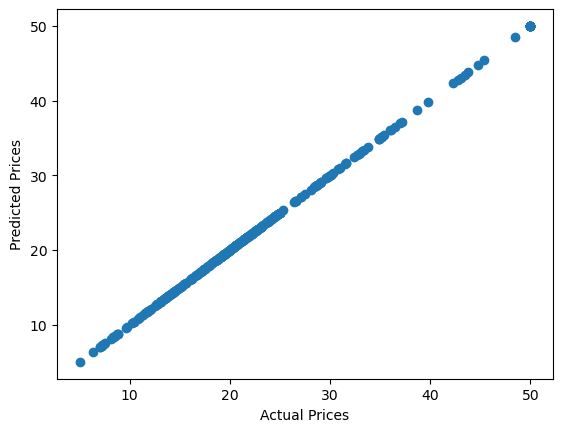

In [ ]:
#Visualize the actual value on the predicted value

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price  vs Predicted Price")

In [34]:
#Accuracy for prediction test data

test_data_prediction = model.predict(X_test)


print(test_data_prediction)

[21.005878  22.196203  30.5483     6.6124997 15.4265785 21.841581
 26.633707  15.2843895 31.618378  23.768753  28.693087  22.575552
 22.423355  26.993597  23.110023  31.570856  23.302145  21.594858
 24.628725  33.758835  23.060106  20.103207  29.347319  27.393394
 21.442116  45.611546  17.48961   29.543087  19.32598    8.718788
 23.505026  27.129484  20.29957   28.311563  23.720207   7.3592987
 26.47518   26.72953   15.054524  16.92485   20.334011  26.325573
 21.087194  18.550314  27.397383   7.8572335 25.170511  20.249989
 19.793428  29.456615  25.196472  35.04069   21.47769    7.0843263
 21.546322  25.870903  36.254414  18.334003  16.716589  14.807514
 24.653097  16.879595  20.670479  32.46774   23.729809  35.99651
 18.470425  17.007607  22.740442  20.249287  35.536785  15.425072
 18.185442  21.884027  51.860672  28.037697  45.206333  22.605751
 21.250992 ]


In [35]:
 #R squared error & mean squeared error

score_1 = metrics.r2_score(y_test, test_data_prediction)

#Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squered error : ", score_1)

print("Mean absolute error : ", score_2 )

R squered error :  0.8470798633773929
Mean absolute error :  2.254431766799734
